# D207 Performance Assessment
**Student:** Chris Fischer 
**ID:** 011933891
**Dataset:** Medical
---

## Initialization
---

### Import libraries

In [6]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2_contingency
from ydata_profiling import ProfileReport
from IPython.display import HTML

### Set Pandas options

In [2]:
#allow pd.describe to show all columns of the data frame [In-Text Citation: (Ray, S., 2020)]
pd.options.display.max_columns = None 

### Set up any lists

In [3]:
# List of independent variables to examine
study_vars = ['HighBlood',
              'Stroke',
              'Overweight',
              'Arthritis',
              'Diabetes',
              'Hyperlipidemia',
              'BackPain',
              'Anxiety',
              'Allergic_rhinitis',
              'Asthma',
              'Soft_drink',
              'State',
              'Gender',
              'Marital',
              'Item1',
              'Item2',
              'Item3',
              'Item4',
              'Item5',
              'Item6',
              'Item7',
              'Item8']

### Load raw data from CSV

In [5]:
medical = pd.read_csv("medical_clean.csv")
medical.info()
profile=ProfileReport(medical)
profile.to_file("Medical_profile.html")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Yes'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## B - Perform Study Analysis
---

### Perform chi square test on selected categorical variables vs. ReAdmis

In [29]:
# Standard alpha value
alpha = 0.05
# List to store results
results = []

# Iterate through study variables
for var in study_vars :
    # Create the contingency table
    contingency = pd.crosstab(medical['ReAdmis'], medical[var])

    # Check for any cells with frequency < 5
    # [In-Text Citation: (DataScienceTribe Staff, 2023)]
    has_under_5 = (contingency < 5).any(axis = 1)

    # If any < 5 found, report the variable and skip
    if (has_under_5.any()) :
        print(contingency)
        print(f'{var} has one or more cells less than 5. Skipping\n')
        continue

    # Perform the X2 test of contingency
    chi, p, dof, expected = chi2_contingency(contingency)

    # Add to results list: variable, X2 value, p value, degrees of freedom, boolean indicating if p < alpha
    results.append([var, chi, p, dof, p <= alpha])

Item1      1    2     3     4    5    6  7  8
ReAdmis                                      
No       134  823  2137  2184  891  155  7  0
Yes       79  492  1267  1271  486   70  3  1
Item1 has one or more cells less than 5. Skipping

Item3      1    2     3     4    5    6  7  8
ReAdmis                                      
No       135  871  2090  2191  894  144  6  0
Yes       76  485  1289  1273  464   76  5  1
Item3 has one or more cells less than 5. Skipping

Item5      1    2     3     4    5    6  7
ReAdmis                                   
No       136  874  2176  2185  810  141  9
Yes       75  506  1247  1261  498   78  4
Item5 has one or more cells less than 5. Skipping

Item6      1    2     3     4    5    6  7
ReAdmis                                   
No       130  829  2120  2192  899  153  8
Yes       83  490  1251  1272  504   67  2
Item6 has one or more cells less than 5. Skipping

Item8      1    2     3     4    5    6   7
ReAdmis                                 

### Visualize the results

In [30]:
# Convert the list to a df for readability
results_df = pd.DataFrame(results, columns=['Variable','chisq','p-value','dof','reject-H0'])
results_df.set_index('Variable', inplace=True)
print(results_df)

                       chisq   p-value  dof  reject-H0
Variable                                              
HighBlood           0.042397  0.836866    1      False
Stroke              0.004340  0.947477    1      False
Overweight          0.698480  0.403295    1      False
Arthritis           0.554512  0.456480    1      False
Diabetes            0.079833  0.777524    1      False
Hyperlipidemia      0.167074  0.682726    1      False
BackPain            1.716615  0.190129    1      False
Anxiety             0.047705  0.827107    1      False
Allergic_rhinitis   0.196991  0.657161    1      False
Asthma              2.857452  0.090951    1      False
Soft_drink          0.557316  0.455344    1      False
State              46.757892  0.642720   51      False
Gender              1.585771  0.452537    2      False
Marital             5.085194  0.278667    4      False
Item2               9.129144  0.166444    6      False
Item4               5.007596  0.542839    6      False
Item7     

### Plot the results

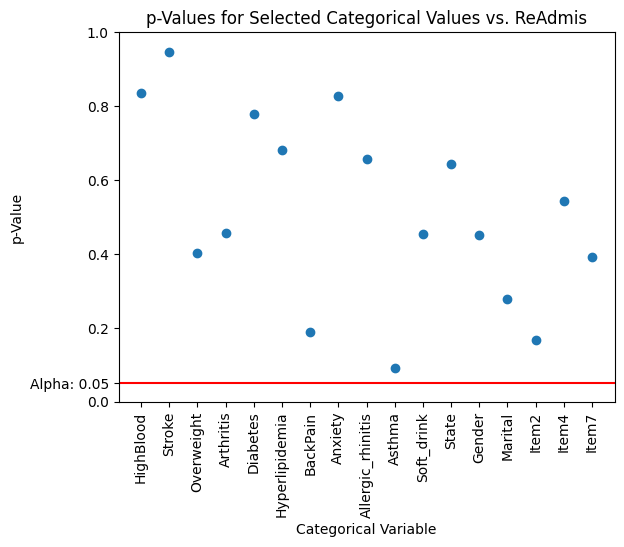

In [31]:
# Plot the results
fig, ax = plt.subplots()
ax.scatter(results_df.index,results_df['p-value'])

# Add horizontal line for alpha value
ax.axhline(y=0.05, color='r', linestyle='-')

# Add decorations
# [In-Text Citation: (Landup, D., 2023)]
plt.ylim(0,1)
# [In-Text Citation: (Little, S., 2016)]
plt.xticks(rotation=90)
plt.title("p-Values for Selected Categorical Values vs. ReAdmis")
plt.xlabel("Categorical Variable")
plt.ylabel("p-Value")

# Add a y label for the alpha value line
# [In-Text Citation: (Morwenn, 2023)]
yticks = [*ax.get_yticks(), 0.05]
yticklabels = [*ax.get_yticklabels(), 'Alpha: 0.05']
ax.set_yticks(yticks, labels=yticklabels)

# Show the plot
plt.show()

## C - Univariate Statistics
---

### Univariate plots for continuous variables

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64


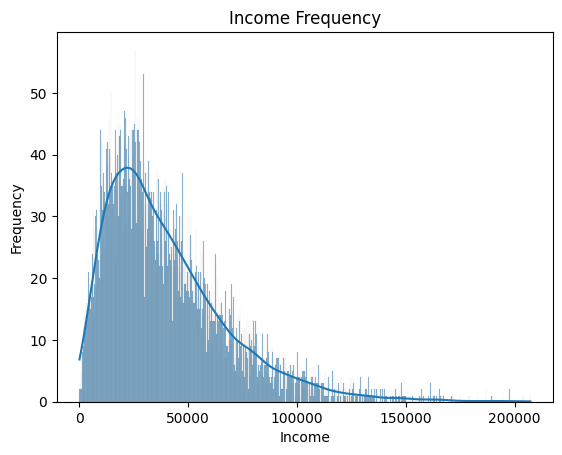

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64


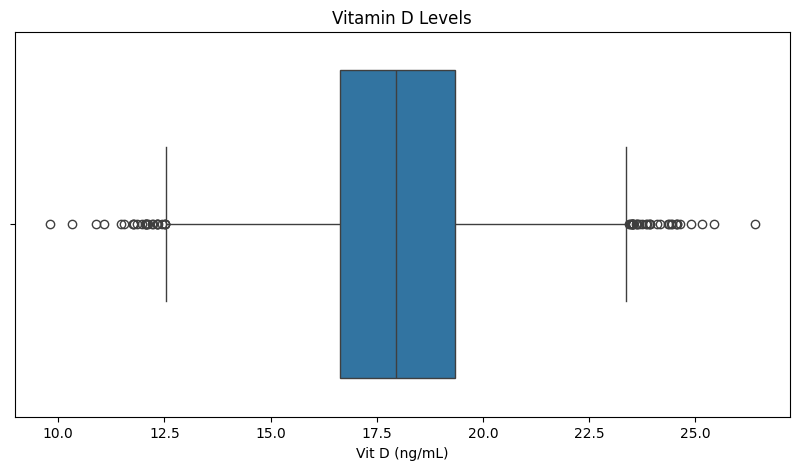

In [32]:
# Histogram with density plot of Income
print(medical['Income'].describe())
plt.title('Income Frequency')
plt.xlabel('Income')
plt.ylabel('Frequency')
sns.histplot(medical['Income'],bins=1000,kde=True)
plt.show()

# Boxplot of Vitamin D Level
print(medical['VitD_levels'].describe())
plt.figure(figsize=(10,5))
plt.title('Vitamin D Levels')
plt.xlabel('Vit D (ng/mL)')
sns.boxplot(x=medical['VitD_levels'])
plt.show()

### Univariate plots for categorical variables

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64


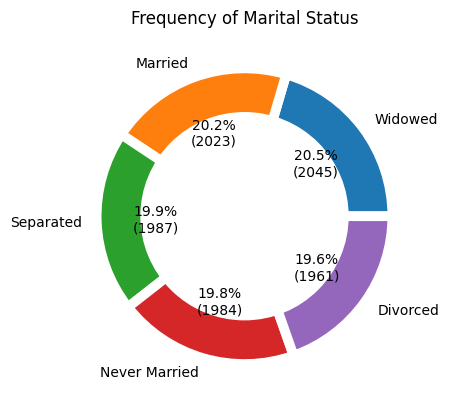

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64


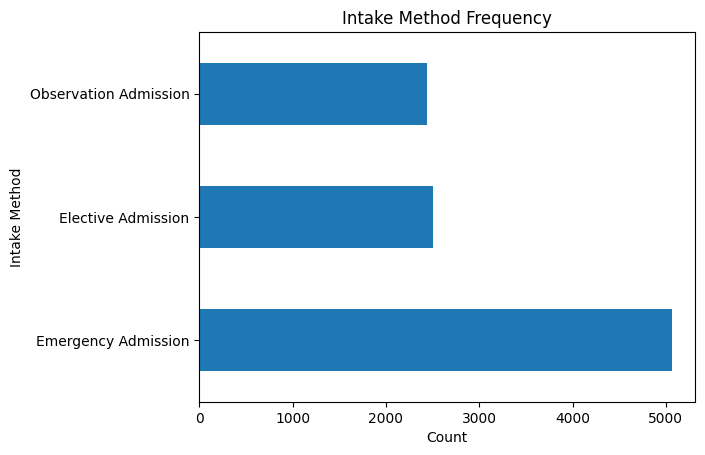

In [33]:
# Donut chart of Marital Status

# Define a custom formatting function
# [In-Text Citation: (Collado, S. D., 2022)]
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

# Count the values for each Martial status
results = medical['Marital'].value_counts()
print(results)

# Create the chart
# [In-Text Citation: (Holtz, Y., 2021)]
plt.pie(results, labels=results.index, autopct=autopct_format(results), wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title('Frequency of Marital Status')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#Frequency bar chart of Intial_Admin
results = medical['Initial_admin'].value_counts()
print(results)
results.plot(kind='barh',xlabel='Count', ylabel='Intake Method')
plt.title('Intake Method Frequency')
plt.show()

## D - Bivariate Statistics
---

### Bivariate plot for two continuous variables

Pearsons correlation: -0.014
Spearmans correlation: -0.013


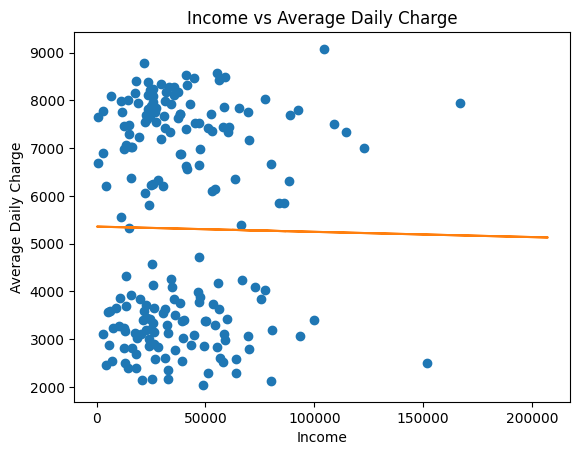

In [34]:
# Plot Income vs TotalCharge
pcorr, _ = pearsonr(medical['Income'], medical['TotalCharge'])
scorr, _ = spearmanr(medical['Income'], medical['TotalCharge'])
print(f'Pearsons correlation: {pcorr:.3f}')
print(f'Spearmans correlation: {scorr:.3f}')
plt.plot(medical['Income'].sample(200), medical['TotalCharge'].sample(200), 'o')
plt.title('Income vs Average Daily Charge')
plt.xlabel('Income')
plt.ylabel('Average Daily Charge')

# obtain m (slope) and b(intercept) of linear regression line and add to plot
# [In-Text Citation: (Bobbitt, Z., 2020)]
m, b = np.polyfit(medical['Income'], medical['TotalCharge'], 1)
plt.plot(medical['Income'], m*medical['Income']+b)

plt.show()

### Bivariate plot for two categorical variables

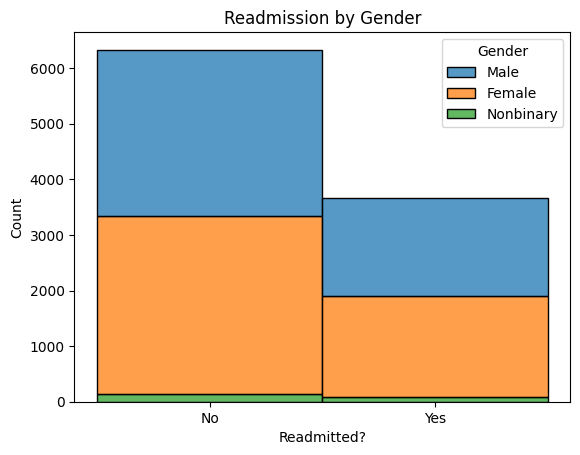

In [35]:
# Catplot of gender and readmis
# [In-Text Citation: (Martin, M., 2021)]
sns.histplot(binwidth=0.5, x="ReAdmis", hue="Gender", data=medical, stat="count", multiple="stack")
plt.title('Readmission by Gender')
plt.xlabel('Readmitted?')
plt.ylabel('Count')
plt.show()